In [1]:
1 + 1

2

In [2]:
from my_tools import *

In [3]:
# Q_MINCOIN
MNC = CoinDataMgr(blocksci_path="/home/ubuntu/mincoin",
                  path_to_clusters="/home/ubuntu/~/clusters2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks",
                  max_block=500000)

Got 500000 blocks
Got 90517 clusters


In [4]:
MNC[S_NCS].readAll()
MNC[S_ADDS_CNTS].readAll()
MNC[S_CLS_CNTS].readAll()
MNC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeAddressesCounts'...
  Got 'int1000b_activeAddressesCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_activeClustersCounts'...
  Got 'int1000b_activeClustersCounts.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth.json', key is ''
  Got 'int1000b_ginisOfClustersWealth_oldQ.json', key is 'oldQ'
Finish


In [40]:
MNC.d[S_CLS_CNTS].v[''][:10]

[21, 46, 83, 100, 114, 111, 146, 73, 195, 76]

In [15]:
MNC.guessMiners()

Work time 7.3s


In [22]:
kutak = getActiveAddressesCounts(MNC.blocks, MNC.group_size)

In [23]:
kutak == MNC[S_ADDS_CNTS]['']

True

In [405]:
#MNC.showDataAndVersions()

In [406]:
#MNC.gatherAllMetrics({S_NCS: '', S_GINIS: ''})

In [46]:
MNC.getMapAddress2Cluster(key='np')

Work time 11.48s


In [ ]:
dictB[blocksci.address_type.nonstandard]

In [49]:
MNC.getActiveClustersCounts(key='usingNpMap')

Work time 16.65s


In [52]:
MNC[S_CLS_CNTS][''][::30]# == MNC[S_CLS_CNTS]['usingNpMap']

[21, 148, 172, 172, 51, 32, 42, 47, 323, 83, 132, 208, 279, 106, 54, 48, 39]

In [410]:
MNC.getGinis(key='usingNpMap')

90516
Work time 21.72s


In [413]:
MNC[S_GINIS][''] == MNC[S_GINIS]['usingNpMap']

True

In [415]:
MNC.getActiveClustersCounts(key='usingNpMap')

Work time 16.79s


In [417]:
MNC[S_CLS_CNTS].v.keys()

dict_keys(['', 'usingNonSerMap', 'usingNpMap'])

In [ ]:
MNC.getActiveClustersCounts(key='usingNpMap')

In [309]:
#f = MNC.drawGraph(metric_version_dict={S_NCS: '', S_GINIS: ''})

In [308]:
#f = MNC.drawGraph(allMetrics_tag='ginisOfClustersWealth=_NacamotoCoefs=')

In [307]:
#MNC.allMetrics.v['ginisOfClustersWealth=_NacamotoCoefs=']

In [71]:
MNC.map_address2cluster.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_500k_blocks' with prefix 'int1000b_map_add2cl'...
  Got 'int1000b_map_add2cl.hdf5', key is ''
Finish


In [6]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 2000 blocks
Got 9312234 clusters


In [18]:
LTC[S_NCS].readAll()
LTC[S_ADDS_CNTS].readAll()
LTC[S_CLS_CNTS].readAll()
LTC[S_GINIS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_NacamotoCoefs'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeAddressesCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_activeClustersCounts'...
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/litecoin_first_2k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
Finish


In [20]:
#LTC_2k.getMapAddress2Cluster(key='np')

In [31]:
LTC[S_MAP_A2C].read('np')

In [46]:
#LTC.d[S_MAP_A2C].save('np', check=False)

Saving "np" version in "/home/ubuntu/thesis_work/calculated/litecoin/int1000b_map_address2cluster_np" file


In [23]:
LTC.getActiveClustersCounts(key='usingNpMap')

Work time 0.05s


In [62]:
len(LTC[S_CLS_CNTS]['usingNpMap'])

1422

In [181]:
# QW_BITCOIN
chain_b = blocksci.Blockchain("/home/ubuntu/bitcoin")
blocks_b = chain_b[:]
INTERVAL_B = 1000
len(chain_b)

523426

In [182]:
cl_mgr_b = blocksci.cluster.ClusterManager("~/clusters_b", chain_b)
#%time cl_mgr_b.create_clustering(location='~/clusters_b', chain=chain_b)
all_clusters_b = cl_mgr_b.clusters()
len(all_clusters_b)

206433637

In [6]:
%time adds_count_b = sum(1 for x in all_addresses_b)

CPU times: user 34min 18s, sys: 56 ms, total: 34min 18s
Wall time: 34min 18s


In [7]:
adds_count_b

1977628451

In [247]:
# SAVE METRICS:
import json
prefix_b = 'calculated/bitcoin/int{}b_'.format(INTERVAL_B)
#with open(prefix_b + 'NC', 'w') as fout:
#    fout.write(json.dumps(NC_b))
#with open(prefix_b + 'adds_counts', 'w') as fout:
#    fout.write(json.dumps(adds_counts_b))
with open(prefix_b + 'cur_clusters', 'w') as fout:
    fout.write(json.dumps(cur_clusters_np_b))
#with open(prefix_b + 'ginis', 'w') as fout:
#    fout.write(json.dumps(ginis_np_b))

In [9]:
def foo():
    f = plt.figure(figsize=(20, 3))
    axes = f.subplots(2, 1, sharex=True)
    axes[0].plot([1, 4, 3])
    axes[0].set_title("Nakamoto coefficient")
    axes[1].plot([5, 3, 1])
    axes[1].set_title("Active addresses count")
    return f

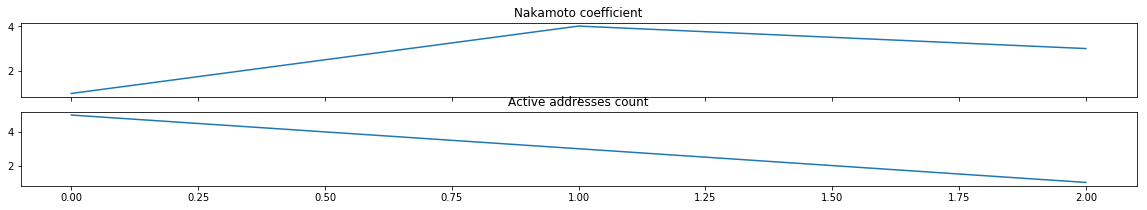

In [10]:
f = foo()
a = 4

In [176]:
f.savefig("dfsdlv.png")

In [108]:
%time balance_np_0_m = getClustersBalanceChangeBlocksNp(blocks_m[:100000], the_map_new_np_m, np.zeros(len(all_clusters_m)))

CPU times: user 3.93 s, sys: 0 ns, total: 3.93 s
Wall time: 3.93 s


In [109]:
%time balance_0_m = getClustersBalanceChangeBlocks(blocks_m[:100000], the_map_new_m, np.zeros(len(all_clusters_m)))

CPU times: user 3.85 s, sys: 0 ns, total: 3.85 s
Wall time: 3.85 s


In [104]:
(balance_0_m == balance_np_0_m).all()

True

In [179]:
import pandas as pd
prices_l_df = pd.read_csv('~/thesis_work/downloaded/ltc-usd-max.csv')
#prices_half_l_df = prices_l_df[pd.to_datetime(prices_l_df['snapped_at']) <= times_l[-1]]
#prices_l_df[:3]